## 1. Gere manualmente ("no braço") um dataset (array) com 10 elementos inteiros, tendo como média o valor 3 e como desvio padrão um valor próximo de 2. Desenhe o histograma para os dados gerados.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [31]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5])

In [32]:
np.mean(data)

3.0

In [33]:
np.std(data)

1.1547005383792515

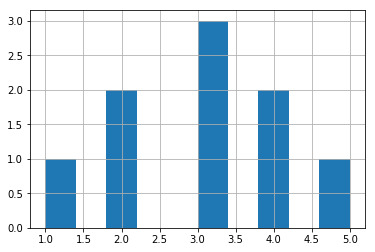

In [34]:
plt.hist(data);
plt.grid()

## 2. Gere dados randômicos e desenhe o histograma para uma distribuição normal contendo 5000 pontos, que tem como média o valor 60 e como desvio padrão o valor 10.

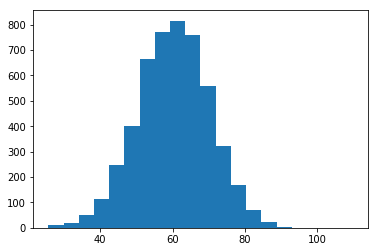

In [6]:
array = np.random.normal(loc=60, scale=10, size=5000)
plt.hist(array, bins=20);

## 3. Gere dados randômicos e desenhe o histograma para 2 distribuições escolhidas por você (exceto a dist. normal/gaussiana) a partir da figura a seguir:

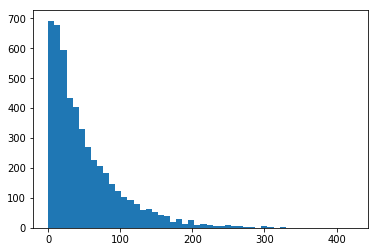

In [7]:
data_ = np.random.exponential(scale=50, size=5000)
plt.hist(data_, bins=50);

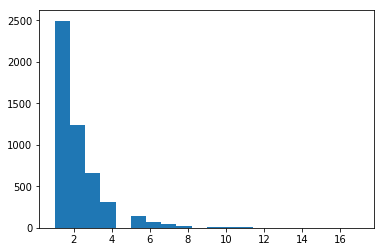

In [8]:
data_1 = np.random.geometric(p=0.5, size=5000)
plt.hist(data_1, bins=20);

## 4. Altere os parâmetros do Gradiente Descendente do notebook 04-Gradiente Descendente.ipynb, para que a diferença entre o valor da métrica de erro do Gradiente Descendente e o valor da métrica de erro da Regressão Linear do Scikit Learn seja menor do que 0.01. Obtenha os coeficientes da regressão linear e o valor do erro.

### Implementação do Gradiente Descendente

In [9]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

### Carrega Dados

In [10]:
# points = np.array([[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]])
points = np.genfromtxt("data.csv", delimiter=",")

### Definição dos Parametros para Execução

In [11]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 80
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 80 iterações, obtemos b0 = -3.6675371689268946e+133, b1 = -1.865985257351132e+135, error = 8.67998254912577e+273
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.93 ms


### Resultado Usando scikit learn

In [12]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

b0 = 7.991020982270399, b1 = [ 1.32243102], error = 110.25738346621316
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 56.8 ms


#### Coeficiente B0 = 7.991020982211303
#### Coeficiente B1 = 1.3224310227565212
#### Error = 110.25738346621316
#### Numero de interações necessarias para que a diferença do erro fosse menor que 0.01 foi igual a 10000000 interações.

### 4.1. Para que a execução funcione com uma learning_rate de 0.01 é necessario apenas de 80 interações.

### 4.2. O parametro modificado é a quantidade de interações,sendo modificado para 80 interações.

# 5. Use o gradiente descendente com boa precisão para:

In [13]:
dados = np.array([[1400, 245000], [1600, 312000], [1700, 279000], [1875, 308000], [1100, 199000], [1550, 219000], [2350, 405000], [2450, 324000], [1425, 319000], [1700, 255000]])

In [ ]:
%%time
x_ = dados[:, 0]
y_ = dados[:, 1]
learning_rate_ = 0.0000000001
initial_b0_ = 0 # y-intercept inicial
initial_b1_ = 0 # inclinação inicial
num_iterations_ = 10000000
b0, b1 = gradient_descent_runner(x_, y_, initial_b0_, initial_b1_, learning_rate_, num_iterations_)
#run(x_, y_, initial_b0_, initial_b1_, learning_rate_, num_iterations_)

In [28]:
def converte(tamanho):
    return tamanho / 0.092903

In [29]:
def valor_casa(tamanho, b0, b1):
    return b1 * converte(tamanho) + b0

In [30]:
print("Valor da casa: {}$".format(valor_casa(100, b0, b1)))

Valor da casa: 176689.48080752132$
